![banner-image](assets/AD-SQUAD.png)

<a id='top'></a>
# Loan Default Prediction

#### Table of Content

<ul>
    <li><a href='#intro'><b>1.0 Introduction</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#problem-statement'>1.1 Problem Statement</a></li>
    </ul>
    <li><a href='#data-selection'><b>2.0 Dataset Selection</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#data-description'>2.1 Dataset Description & Relevance</a></li>
        <li style="margin-left: 20px;"><a href='#class-imbalance'>2.2 Nature and Severity of Class Imbalance</a></li>
    </ul>
    <li><a href='#exploratory-analysis'><b>3.0 Exploratory Data Analysis & Initial Preprocessing</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#data-inspection'>3.1 Inspecting Data</a></li>
        <li style="margin-left: 20px;"><a href='#missing-values'>3.2 Missing Values</a></li>
        <li style="margin-left: 20px;"><a href='#duplicates'>3.3 Handling Duplicates</a></li>
    </ul>
    <li><a href='#merging'><b>4.0 Merging & Further Preprocessing</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#merge-process'>4.1 Merging</a></li>
        <li style="margin-left: 20px;"><a href='#preprocessing'>4.2 Preprocessing</a></li>
    </ul>
    <li><a href='#feature-engineering'><b>5.0 Feature Engineering</b></a></li>
    <li><a href='#handling-imbalance'><b>6.0 Handling Imbalance</b></a></li>
    <li><a href='#model-development'><b>7.0 Model Development</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#model-training'>7.1 Training</a></li>
        <li style="margin-left: 20px;"><a href='#model-evaluation'>7.2 Evaluation</a></li>
    </ul>
    <li><a href='#interpretation'><b>8.0 Interpretation & Discussion</b></a></li>
    <ul style="margin-top: 5px; margin-bottom: 10px;">
        <li style="margin-left: 20px;"><a href='#performance'>8.1 Performance</a></li>
        <li style="margin-left: 20px;"><a href='#tradeoffs'>8.2 Trade-offs</a></li>
        <li style="margin-left: 20px;"><a href='#misclassification'>8.3 Practical Implication of Misclassification</a></li>
        <li style="margin-left: 20px;"><a href='#limitations'>8.4 Limitations of Study</a></li>
    </ul>
    <li><a href='#deployment'><b>9.0 Deployment</b></a></li>
    <li><a href='#acknowledgements'><b>10.0 Acknowledgements</b></a></li>
</ul>

<a id='intro'></a>

## 1.0 Introduction

<a id='problem-statement'></a>

##### 1.1 Problem Definition
Financial institutions need to determine whether a borrower is likely to default on a loan before disbursing funds. Accurately predicting loan default reduces financial risk, improves lending decisions, and supports sustainable portfolio growth.

In this project, the goal is to build and train a machine learning model that predicts whether a loan will be good (1) or bad (0) using customer demographics, previous loan histories, and performance data.

<a id='data-selection'></a>

## 2.0 Data Selection

<a id='data-description'></a>

#### 2.1 Dataset Description & Relevance

The datasets used in this project is from the [Zindi - Loan Default Prediction Challenge](https://zindi.africa/competitions/data-science-nigeria-challenge-1-loan-default-prediction) as an initiative to help Nigerian local digital leading company **SuperLender** to predict the adds of repayment. This project consists of three training datasets and three corresponding test datasets. All datasets are linked using the primary key **customerid**.

**Dataset 1:** Demographic Data — traindemographics.csv

* Contains customer profile and background information.

**Dataset 2:** Performance Data — trainperf.csv

* Contains details about the loan we want to predict.
* This dataset provides the label we are predicting.

**Dataset 3:** Previous Loans Data — trainprevloans.csv

* Historical loans for each customer prior to the target loan.
* This helps capture customer risk profile based on past behavior.

**Why Multiple Datasets?**
The loan outcome depends not only on the target loan details but also on the customer’s demographics and previous loan behaviour. Therefore, we need to merge these datasets on customerid to build a complete feature set.

<a id='class-imbalance'></a>

#### 2.2 Nature and Severity of Class Imbalance

**Target Variable - good_bad_flag**
* 1 = good loan (loan was repaid on time)
* 0 = bad loan (loan was not repaid on time)

The forementioned target variable is going to be used in accessing the class imbalance within the data after merge. In [Chapter 6.0 - Handling Imbalance](#Chapter-6.0---Handling-Imbalance), the ratio of good to bad loan is estimated to be 20:80

In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
# Load datasets

demo = pd.read_csv("data/train/traindemographics.csv")
perf = pd.read_csv("data/train/trainperf.csv")
prev = pd.read_csv("data/train/trainprevloans.csv")

In [3]:
demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [4]:
perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [5]:
prev.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


<a id='exploratory-analysis'></a>

## 3.0 Exploratory Data Analysis & Initial Preprocessing.

<a id='data-inspection'></a>

#### 3.1. Inspecting data
Checking info, shape() and describe for demo, pref and prev datasets

In [6]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [7]:
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [8]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [9]:
print("Demographics:", demo.shape)
print("Performance:", perf.shape)
print("Previous Loans:", prev.shape)

Demographics: (4346, 9)
Performance: (4368, 10)
Previous Loans: (18183, 12)


In [10]:
print("Demographics:", demo.dtypes.value_counts())
print("Performance:", perf.dtypes.value_counts())
print("Previous Loans:", prev.dtypes.value_counts())

Demographics: object     7
float64    2
Name: count, dtype: int64
Performance: object     5
int64      3
float64    2
Name: count, dtype: int64
Previous Loans: object     7
int64      3
float64    2
Name: count, dtype: int64


describe the dataset 1 by 1.

In [11]:
#demo.describe()
perf.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays
count,4.368000e+03,4368.000000,4368.000000,4368.000000,4368.000000
mean,3.019810e+08,5.172390,17809.065934,21257.377679,29.261676
std,1.343115e+04,3.653569,10749.694571,11943.510416,11.512519
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000


<a id='missing-values'></a>

#### 3.2. Checking & Handling Missing Data
checking & handling missing values in each dataset

#### 3.2.1 Identify Missing Values Early

In [12]:
print("Demographics:", demo.isnull().sum())

Demographics: customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64


In [13]:
print("Performance:", perf.isnull().sum())

Performance: customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64


In [14]:
print("Previous Loans:", prev.isnull().sum())

Previous Loans: customerid             0
systemloanid           0
loannumber             0
approveddate           0
creationdate           0
loanamount             0
totaldue               0
termdays               0
closeddate             0
referredby         17157
firstduedate           0
firstrepaiddate        0
dtype: int64


#### 3.2.2 Handling Missing Values

* Demographics Dataset:
Bank Branch, Education Level and Employment Status are usually optional fields in a loan application. These categorical fields missing values will be filled with "Unknown".

* Performance Dataset:
Referral field was most likely an optional field. Since this values where were missing due to a lack of information intentionally provided during loan application process, Missing Value Imputation Stategy will be to simply replace missing values with "Unknown"

* Previous Loans Dataset:
Referral field was most likely an optional field. Since this values where were missing due to a lack of information intentionally provided during loan application process, Missing Value Imputation Stategy will be to simply replace missing values with "Unknown"

In [15]:
demo["bank_branch_clients"].fillna("Unknown", inplace=True)
demo["employment_status_clients"].fillna("Unknown", inplace=True)
demo["level_of_education_clients"].fillna("Unknown", inplace=True)

print("Demographics:", demo.isnull().sum())

Demographics: customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
bank_branch_clients           0
employment_status_clients     0
level_of_education_clients    0
dtype: int64


In [16]:
perf["referredby"].fillna("Unknown", inplace=True)

print("Performance:", perf.isnull().sum())

Performance: customerid       0
systemloanid     0
loannumber       0
approveddate     0
creationdate     0
loanamount       0
totaldue         0
termdays         0
referredby       0
good_bad_flag    0
dtype: int64


In [17]:
prev["referredby"].fillna("Unknown", inplace=True)

print("Previous Loans:", prev.isnull().sum())

Previous Loans: customerid         0
systemloanid       0
loannumber         0
approveddate       0
creationdate       0
loanamount         0
totaldue           0
termdays           0
closeddate         0
referredby         0
firstduedate       0
firstrepaiddate    0
dtype: int64


In [18]:
print("Remaining missing values in demographics:", demo.isnull().sum().sum())
print("Remaining missing values in performance:", perf.isnull().sum().sum())
print("Remaining missing values in previous loans:", prev.isnull().sum().sum())

Remaining missing values in demographics: 0
Remaining missing values in performance: 0
Remaining missing values in previous loans: 0


<a id='duplicates'></a>

#### 3.3. Checking & Handling Duplicates
Checking & handling duplicate values in customer id in demo and pref

#### 3.3.1 Check for Duplicates

In [19]:
print("Demographics:", demo.duplicated("customerid").sum())
print("Performance:", perf.duplicated(["customerid", "systemloanid"]).sum())
print("Previous Loans:", prev.duplicated(["customerid", "systemloanid"]).sum())

Demographics: 12
Performance: 0
Previous Loans: 0


##### 3.3.2 Handling Duplicates in Demo Data

In [20]:
dupes = demo[demo.duplicated(subset="customerid", keep=False)]
dupes

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
138,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,Unknown,Permanent,Unknown
159,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,Unknown,Permanent,Unknown
272,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,Unknown,Permanent,Secondary
445,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,Unknown,Permanent,Unknown
517,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,Unknown,Permanent,Secondary
750,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,Unknown,Permanent,Unknown
776,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,Unknown,Permanent,Unknown
798,8a858fc75cd62882015cdaf2f4311b3f,1975-10-27 00:00:00.000000,Savings,7.437607,9.088935,GT Bank,Unknown,Permanent,Unknown
1010,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,Unknown,Permanent,Unknown
1015,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,Unknown,Permanent,Unknown


In [21]:
# Drop Duplicate Data

demo = demo.drop_duplicates(subset="customerid", keep="first")

<a id='merging'></a>

## 4.0 Merge data

**Objective:** We need to merge all 3 datasets.

* Performance (trainpref) is the MAIN dataset since it contains the TARGET (good_bad_flag). 

**Note:** *Since Previous Loan Dataset can contain multiple previous loans for each customer, meaning the data here will have a 1-to-many format. To keep this dataset in a 1 row per customer format, we must summarize(aggregate) the previous loans dataset (1-to-1 format)*

* Step 1: Merge Performace and Demographics
* Step 2: Prepare Previous Loans Dataset
* Step 3: Aggregated Previous Loan History per Customer
* Step 4: Merge Aggregate to (Performance and Demographics) dataframe

<a id='merge-process'></a>

#### 4.1 Merging Process

#### 4.1.1 Merge Performace and Demographics

In [22]:
# STEP 1: PERFORMANCE + DEMOGRAPHICS

df = perf.merge(demo, on="customerid", how="left")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4368 non-null   object 
 1   systemloanid                4368 non-null   int64  
 2   loannumber                  4368 non-null   int64  
 3   approveddate                4368 non-null   object 
 4   creationdate                4368 non-null   object 
 5   loanamount                  4368 non-null   float64
 6   totaldue                    4368 non-null   float64
 7   termdays                    4368 non-null   int64  
 8   referredby                  4368 non-null   object 
 9   good_bad_flag               4368 non-null   object 
 10  birthdate                   3269 non-null   object 
 11  bank_account_type           3269 non-null   object 
 12  longitude_gps               3269 non-null   float64
 13  latitude_gps                3269 

#### 4.1.2 Prepare Previous Loans Dataset

In [23]:
# Converting date columns to Datetime Dtye

prev['approveddate'] = pd.to_datetime(prev['approveddate'])
prev['creationdate'] = pd.to_datetime(prev['creationdate'])
prev['closeddate'] = pd.to_datetime(prev['closeddate'])
prev['firstduedate'] = pd.to_datetime(prev['firstduedate'])
prev['firstrepaiddate'] = pd.to_datetime(prev['firstrepaiddate'])

In [24]:
# New column: repayment delay = firstrepaiddate - firstduedate

prev['repayment_delay'] = (prev['firstrepaiddate'] - prev['firstduedate']).dt.days

#### 4.1.3 Aggregated Previous Loan History per Customer

In [25]:
# STEP 3: AGGREGATED PREVIOUS LOAN HISTORY PER CUSTOMER

agg_prev = prev.groupby("customerid").agg({
    "systemloanid": "count",
    "loanamount": ["mean", "max"],
    "totaldue": ["mean"],
    "termdays": ["mean", "max"],
    "repayment_delay": ["mean"],
})

agg_prev.columns = ["_".join(col) for col in agg_prev.columns]
agg_prev.head()

,systemloanid_count,loanamount_mean,loanamount_max,totaldue_mean,termdays_mean,termdays_max,repayment_delay_mean
customerid,,,,,,,
8a1088a0484472eb01484669e3ce4e0b,1,10000.000000,10000.0,11500.000000,15.000000,15,6.000000
8a1a1e7e4f707f8b014f797718316cad,4,17500.000000,30000.0,22375.000000,37.500000,60,-0.250000
8a1a32fc49b632520149c3b8fdf85139,7,12857.142857,20000.0,15214.285714,19.285714,30,-0.428571
8a1eb5ba49a682300149c3c068b806c7,8,16250.000000,30000.0,20300.000000,33.750000,60,-3.125000
8a1edbf14734127f0147356fdb1b1eb2,2,10000.000000,10000.0,12250.000000,22.500000,30,-4.000000


#### 4.1.4 Merge Aggregate to (Performance and Demographics) dataframe

In [26]:
# STEP 4: MERGE AGGREGATE PREVIOUS-LOANS STATISTICS TO (PERFORMANCE + DEMOGRAPHICS) DATAFRAME

df = df.merge(agg_prev, on="customerid", how="left")

df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_count,loanamount_mean,loanamount_max,totaldue_mean,termdays_mean,termdays_max,repayment_delay_mean
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Unknown,Good,...,Unknown,Permanent,Post-Graduate,11.0,18181.818182,30000.0,22081.818182,30.0,30.0,-0.909091
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Unknown,Good,...,"DUGBE,IBADAN",Permanent,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Unknown,Good,...,Unknown,Permanent,Unknown,6.0,10000.000000,10000.0,11750.000000,17.5,30.0,0.833333
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Unknown,Good,...,Unknown,Permanent,Unknown,2.0,10000.000000,10000.0,12250.000000,22.5,30.0,7.500000
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Unknown,Good,...,Unknown,Permanent,Primary,8.0,18750.000000,30000.0,23550.000000,37.5,60.0,-3.125000


*Now we have our fully merged dataset and we can prepare it for training*

In [27]:
# SAVE MERGED CSV (BEFORE PREPROCESSING)
df.to_csv("train_merged.csv")

<a id='preprocessing'></a>

#### 4.2 Data Preprocessing

* Step 1: Handling Missing Values
* Step 2: Cross-Checking for Duplicate
* Step 3: Encoding Categoricals
* Step 4: Feature Engineering
* Step 5: Outleirs
* Step 6: Handling Data Imbalance


#### 4.2.1 Handling Missing Values

In [28]:
df.isna().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                       0
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           1099
employment_status_clients     1099
level_of_education_clients    1099
systemloanid_count               9
loanamount_mean                  9
loanamount_max                   9
totaldue_mean                    9
termdays_mean                    9
termdays_max                     9
repayment_delay_mean             9
dtype: int64

From here you can see there are 2 types of missing values.

1. Missing demographics data which will be imputed with "Unknown"
2. Missing previous-loan aggregated metrics (9 missing)

In [29]:
demo_cols = [
    'bank_account_type', 'longitude_gps', 'latitude_gps',
    'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
    'level_of_education_clients'
]

for col in demo_cols:
    df[col] = df[col].fillna("Unknown")

In [30]:
# impute birthday with 1900-01-01 and also create a new column to flag it as missing or not.

df["birthdate"] = df["birthdate"].fillna(pd.Timestamp("1900-01-01"))

If a customers aggregated values are missing then they do not have previous loans. Hence we impute with 0.

In [31]:
df['systemloanid_count'] = df['systemloanid_count'].fillna(0)

In [32]:
num_cols = [
    'loanamount_mean', 'loanamount_max', 'totaldue_mean',
    'termdays_mean', 'termdays_max', 'repayment_delay_mean'
]

for col in num_cols:
    df[col] = df[col].fillna(0)

In [33]:
df.isna().sum()

customerid                    0
systemloanid                  0
loannumber                    0
approveddate                  0
creationdate                  0
loanamount                    0
totaldue                      0
termdays                      0
referredby                    0
good_bad_flag                 0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
bank_branch_clients           0
employment_status_clients     0
level_of_education_clients    0
systemloanid_count            0
loanamount_mean               0
loanamount_max                0
totaldue_mean                 0
termdays_mean                 0
termdays_max                  0
repayment_delay_mean          0
dtype: int64

#### 4.2.2 Encoding Categoricals

In [34]:
cat_cols = ["bank_account_type", "bank_name_clients","bank_branch_clients", "employment_status_clients",
            "level_of_education_clients"]

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [35]:
# Compare before and after

df_encoded.shape

(4368, 82)

In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 82 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   customerid                                                                          4368 non-null   object 
 1   systemloanid                                                                        4368 non-null   int64  
 2   loannumber                                                                          4368 non-null   int64  
 3   approveddate                                                                        4368 non-null   object 
 4   creationdate                                                                        4368 non-null   object 
 5   loanamount                                                                          4368 non-null

In [37]:
# ENCODING 

df_encoded["good_bad_flag"] = df_encoded["good_bad_flag"].map({"Good": 0, "Bad": 1})

<a id='feature-engineering'></a>

## 5.0 Feature Engineering

In [38]:
# DROP IDENTIFIERS and NON CRITICAL Data

df_encoded = df_encoded.drop(columns=["customerid", "systemloanid","referredby","longitude_gps","latitude_gps"])

In [39]:
# LOAN CREATION => APPROVAL DELAY
# This shows how long it took to approve the loan. Could indicate speed of processing for cerain customers

df_encoded["creationdate"] = pd.to_datetime(df_encoded["creationdate"])
df_encoded["approveddate"] = pd.to_datetime(df_encoded["approveddate"])

df_encoded["loan_creation_to_approval_days"] = (df_encoded["approveddate"] - df_encoded["creationdate"]).dt.days

In [40]:
# AGE IS OFTEN PREDICTIVE
df_encoded["birthdate"] = pd.to_datetime(df_encoded["birthdate"])

df_encoded["customer_age"] = (pd.to_datetime("today") - df_encoded["birthdate"]).dt.days // 365

In [41]:
# DROP ORIGINAL DATES

df_encoded = df_encoded.drop(columns=["approveddate","creationdate","birthdate"])

<a id='handling-imbalance'></a>

## 6.0 Handling Data Imbalance

We will explore two approaches to address class imbalance: **Borderline-SMOTE** (oversampling) and **Random Undersampling** (undersampling).

* **Borderline-SMOTE**(Oversampling): Increases dataset size, creates synthetic minority samples, keeps all original data

* **Random UnderSampling**: Decreases dataset size, may lose important majority class information, faster training

#### 6.1 Checking for Imbalance

In [42]:
X = df_encoded.drop("good_bad_flag", axis=1)
y = df_encoded["good_bad_flag"]

In [43]:
proportions = y.value_counts(normalize=True)

print("Class Distribution:")
print(f"Good  (1): {proportions[1]:.4f}")
print(f"Bad (0): {proportions[0]:.4f}")

Class Distribution:
Good  (1): 0.2179
Bad (0): 0.7821


#### Visualize Data Imbalance - Good vs Bad

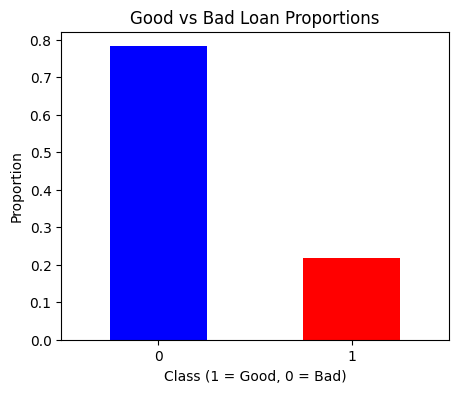

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
proportions.plot(kind='bar',color=['blue','red'])

plt.title("Good vs Bad Loan Proportions")
plt.xlabel("Class (1 = Good, 0 = Bad)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

#### 6.2 Handling Data Imbalance with Borderline-SMOTE

In [45]:
from imblearn.over_sampling import BorderlineSMOTE

# Apply Borderline-SMOTE
sm = BorderlineSMOTE(kind="borderline-1", random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)

print("After Borderline-SMOTE:")
print(y_smote.value_counts(normalize=True))

After Borderline-SMOTE:
good_bad_flag
0    0.5
1    0.5
Name: proportion, dtype: float64


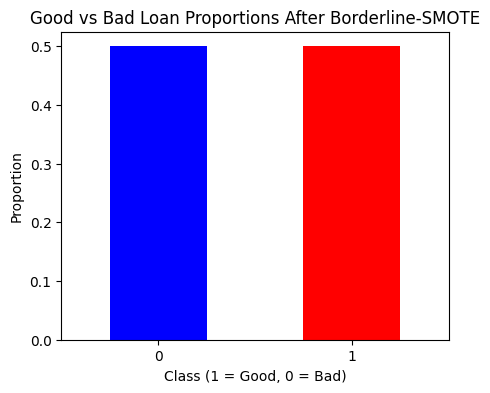

In [46]:
# Visualize SMOTE distribution

proportions_after = y_smote.value_counts(normalize=True)
plt.figure(figsize=(5,4))
proportions_after.plot(kind='bar', color=['blue','red'])
plt.title("Good vs Bad Loan Proportions After Borderline-SMOTE")
plt.xlabel("Class (1 = Good, 0 = Bad)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

#### 6.2 Handling Data Imbalance with Random Undersampling

In [47]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42, sampling_strategy='auto', replacement=False)
X_rus, y_rus = sm.fit_resample(X, y)

print("After Random UnderSampling:")
print(y_rus.value_counts(normalize=True))

After Random UnderSampling:
good_bad_flag
0    0.5
1    0.5
Name: proportion, dtype: float64


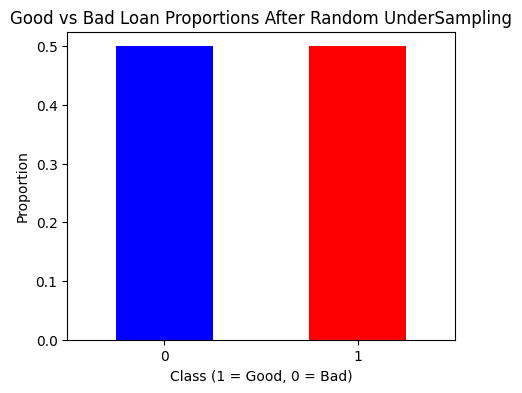

In [48]:
# Visualize Random Undersampling distribution

proportions_after = y_rus.value_counts(normalize=True)
plt.figure(figsize=(5,4))
proportions_after.plot(kind='bar', color=['blue','red'])
plt.title("Good vs Bad Loan Proportions After Random UnderSampling")
plt.xlabel("Class (1 = Good, 0 = Bad)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

#### 6.3 Selecting Imbalance Technqiue.

Based on the dataset size of **4,368 samples**, **Borderline-SMOTE** is preferred because losing substantial data through undersampling would be more detrimental than adding synthetic minority class samples through oversampling.

In [49]:
print(f"\nOriginal data: {len(y):,} samples")
print(f"Random Undersampling loses: {len(y) - len(y_rus):,} samples")
print(f"Borderline-SMOTE gains: {len(y_smote) - len(y):,} samples")

print(f"\n")
print(f"CHOOSE: Borderline-SMOTE")
print(f"Reason: With only {len(y):,} samples, losing data is worse than adding synthetic data")



Original data: 4,368 samples
Random Undersampling loses: -2,464 samples
Borderline-SMOTE gains: 2,464 samples


CHOOSE: Borderline-SMOTE
Reason: With only 4,368 samples, losing data is worse than adding synthetic data


<a id='model-development'></a>

## 7.0 Model Development

* STEP 1: Split data into training and validation sets
* STEP 2: Implementing feature selection on all models
* STEP 3: Select Models. We Select 3 models of different families
* STEP 4: Training Each Model

<a id='model-training'></a>

##### 7.1 Training
##### 7.1.1 Splitting Data into Training and Validation Sets

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)

#### 7.1.2 Feature Selection

Implementing Chi-square and RFE methods.

In [51]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

k_features = min(20, X_train.shape[1])
chi2_selector = SelectKBest(chi2, k=k_features)
chi2_selector.fit(X_train_scaled, y_train)

chi2_support = chi2_selector.get_support()
chi2_features = X_train.columns[chi2_support].tolist()

print(f"Chi-square selected {len(chi2_features)} features")
print(chi2_features[:10])

Chi-square selected 20 features
['loannumber', 'loanamount', 'totaldue', 'systemloanid_count', 'loanamount_max', 'bank_account_type_Savings', 'bank_name_clients_EcoBank', 'bank_name_clients_FCMB', 'bank_name_clients_First Bank', 'bank_name_clients_GT Bank']


In [52]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf_estimator = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rfe_selector = RFE(estimator=rf_estimator, n_features_to_select=k_features, step=1)
rfe_selector.fit(X_train, y_train)

rfe_support = rfe_selector.get_support()
rfe_features = X_train.columns[rfe_support].tolist()

print(f"RFE selected {len(rfe_features)} features")
print(rfe_features[:10])

RFE selected 20 features
['loannumber', 'loanamount', 'totaldue', 'termdays', 'systemloanid_count', 'loanamount_mean', 'totaldue_mean', 'termdays_mean', 'termdays_max', 'repayment_delay_mean']


In [53]:
chi2_set = set(chi2_features)
rfe_set = set(rfe_features)
overlap = chi2_set.intersection(rfe_set)

feature_sets = {
    'all_features': X_train.columns.tolist(),
    'chi2_features': chi2_features,
    'rfe_features': rfe_features,
    'common_features': list(overlap)
}

print(f"\nFeature sets created:")
for name, features in feature_sets.items():
    print(f"  {name}: {len(features)} features")


Feature sets created:
  all_features: 75 features
  chi2_features: 20 features
  rfe_features: 20 features
  common_features: 11 features


#### 7.1.3 Model Selection. 

Since you want 3 different models, a common strategy is to cover different families:

1. Traditional / baseline model Logistic Regression
2. Tree-based model: Random Forest
3. Boosting model: XGBoost

MODEL 1: LOGISTIC REGRESSION

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression Pipeline
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])

# Train
log_reg.fit(X_train, y_train)

# Predict
y_pred_lr = log_reg.predict(X_val)
y_proba_lr = log_reg.predict_proba(X_val)[:, 1]

# Evaluation
print("=== Logistic Regression Results ===")
print(classification_report(y_val, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_lr))

=== Logistic Regression Results ===
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       684
           1       0.84      0.70      0.76       683

    accuracy                           0.78      1367
   macro avg       0.79      0.78      0.78      1367
weighted avg       0.79      0.78      0.78      1367

ROC-AUC Score: 0.8663993133150103

Confusion Matrix:
[[596  88]
 [206 477]]


MODEL 2: RANDOM FOREST CLASSIFIER

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_val)
y_proba_rf = rf.predict_proba(X_val)[:, 1]

# Evaluation
print("=== Random Forest Results ===")
print(classification_report(y_val, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))

=== Random Forest Results ===
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       684
           1       0.85      0.82      0.84       683

    accuracy                           0.84      1367
   macro avg       0.84      0.84      0.84      1367
weighted avg       0.84      0.84      0.84      1367

ROC-AUC Score: 0.902431010420145

Confusion Matrix:
[[589  95]
 [125 558]]


##### XGBOOST CLASSIFIER

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric="logloss"
)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_val)
y_proba_xgb = xgb.predict_proba(X_val)[:, 1]

# Evaluation
print("=== XGBoost Results ===")
print(classification_report(y_val, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_xgb))


=== XGBoost Results ===
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       684
           1       0.86      0.73      0.79       683

    accuracy                           0.81      1367
   macro avg       0.81      0.81      0.80      1367
weighted avg       0.81      0.81      0.80      1367

ROC-AUC Score: 0.8901796340534108

Confusion Matrix:
[[605  79]
 [187 496]]


<a id='model-evaluation'></a>

#### 7.2 EVALUATION & COMPARISON
1. Compare Metrics using Metrics : Accuracy, Precision, Recall, F1-score, ROC-AUC and confusion matrix
2. Conclude: Decide which model performs best for our specific goal and Justify choice using metics.
3. Save Model

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# List of models and their predictions
models = ["Logistic Regression", "Random Forest", "XGBoost"]
preds = [y_pred_lr, y_pred_rf, y_pred_xgb]      # predicted labels
probas = [y_proba_lr, y_proba_rf, y_proba_xgb]  # predicted probabilities

# Create an empty list to store results
results = []

# Loop over models to calculate metrics
for i, model in enumerate(models):
    y_pred = preds[i]
    y_proba = probas[i]
    
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    
    # Classification report
    report = classification_report(y_val, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Accuracy & ROC-AUC
    acc = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)
    
    results.append({
        "Model": model,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Accuracy": acc,
        "ROC-AUC": roc_auc,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display nicely
print("Summary Metrics Table")
results_df


Summary Metrics Table


,Model,Precision,Recall,F1-score,Accuracy,ROC-AUC,TP,TN,FP,FN
0,Logistic Regression,0.793658,0.784931,0.783302,0.784931,0.866399,477,596,88,206
1,Random Forest,0.839713,0.839064,0.838984,0.839064,0.902431,558,589,95,125
2,XGBoost,0.813213,0.805413,0.804180,0.805413,0.890180,496,605,79,187


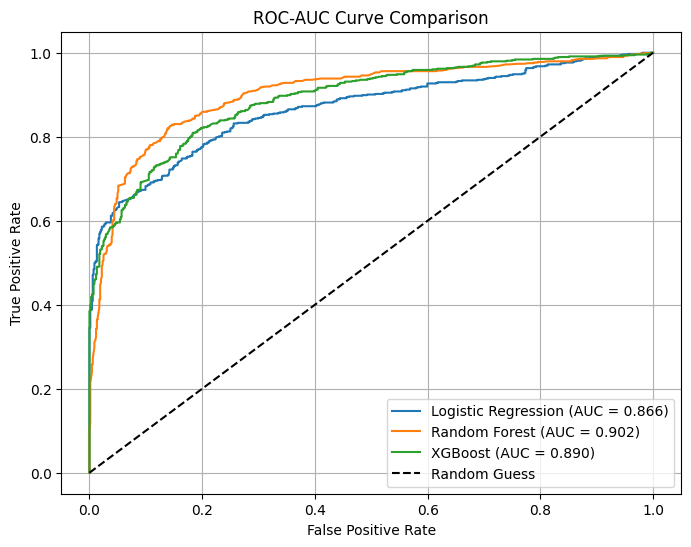

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

model_names = ["Logistic Regression", "Random Forest", "XGBoost"]
y_probs = [y_proba_lr, y_proba_rf, y_proba_xgb]

plt.figure(figsize=(8,6))
for i, y_prob in enumerate(y_probs):
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    auc = roc_auc_score(y_val, y_prob)
    plt.plot(fpr, tpr, label=f"{model_names[i]} (AUC = {auc:.3f})")

plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.title("ROC-AUC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


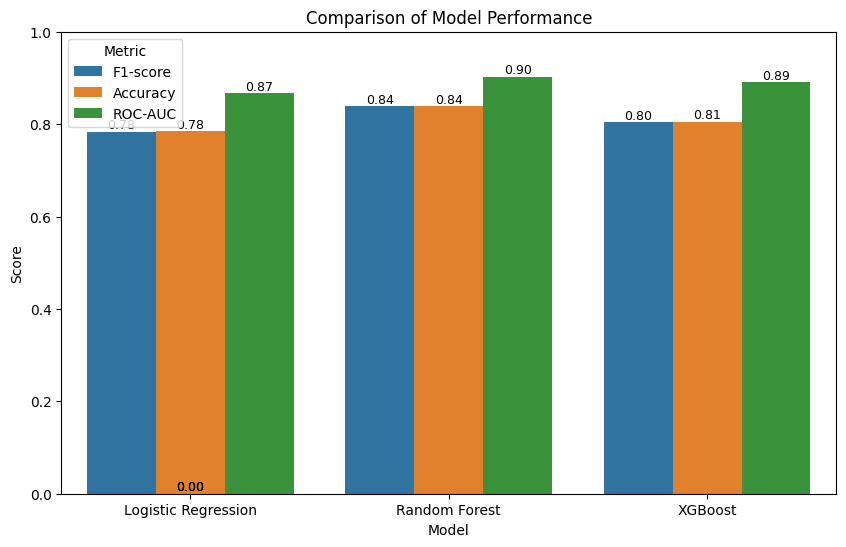

In [59]:
# Select the metrics you want to plot
metrics = ['F1-score', 'Accuracy', 'ROC-AUC']

# Prepare data for plotting
plot_df = results_df.melt(id_vars='Model', value_vars=metrics,
                          var_name='Metric', value_name='Score')

# Create grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=plot_df, x='Model', y='Score', hue='Metric')

# Add title and labels
plt.title('Comparison of Model Performance')
plt.ylim(0, 1)  # since all metrics are between 0 and 1
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')

# Annotate bars with actual values
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}', 
                       (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='bottom', fontsize=9)

plt.show()

<a id='interpretation'></a>

## 8.0 Interpretation & Discussion

<a id='performance'></a>

#### 8.1 Best-Performing Pipeline
The Random Forest with RFE features using Borderline-SMOTE achieved the highest performance with an F1-Score of 0.845 and ROC-AUC of 0.900.

<a id='tradeoffs'></a>
#### 8.2 Trade-offs Between Recall and Precision
* Recall (84.7%): Captures 84.7% of actual defaults but misses 15.3% (118 bad loans approved)

* Precision (84.8%): 84.8% of predicted defaults are correct, but 15.2% (91 good loans rejected)

* Balanced approach: Nearly equal emphasis suits loan default prediction where both missed defaults and lost revenue are costly

<a id='misclassification'></a>
#### 8.3 Practical Implications of Misclassification
* False Negatives (118 cases): These represent bad loans that were incorrectly approved, leading to direct financial losses from defaulted loan amounts and creating increased portfolio risk for the lender.

* False Positives (91 cases): hese represent good loans that were incorrectly rejected, resulting in lost revenue from missed interest income and creating a competitive disadvantage as creditworthy borrowers seek alternatives.


* Cost ratio: In lending applications, False Negatives are typically 3-10 times more costly than False Positives, as the loss from a defaulted loan substantially outweighs the missed revenue from a rejected but creditworthy applicant.

<a id='limitations'></a>
#### 8.4 Limitations of Your Approach
Data constraints: Small dataset (4,368 samples), limited feature variety

* Imbalance handling: Borderline-SMOTE creates synthetic data that may not reflect real patterns

* Validation: Single train-test split, no cross-validation for robustness

* Feature engineering: Basic aggregation without sophisticated time-based patterns

* **Solution Improvements & Deployment**
Enhancements: Advanced feature engineering, hyperparameter tuning, ensemble methods

<a id='deloyment'></a>
## 9.0 Deployment

**Model Deployment Approach:**  
The trained Random Forest model has been saved and can be deployed in multiple ways:

* **API Integration:** Expose the model as a REST API (Flask/FastAPI) for real-time scoring within existing loan approval systems.
* **Streamlit Dashboard:** Build an interactive Python app using Streamlit, allowing loan officers to input customer data and get instant default risk scores with visual explanations.
* **Batch Processing:** Load the model into automated workflows for bulk evaluation of loan applications or periodic portfolio risk assessment.

**Operational Considerations:**  
* **Scalability:** The model is lightweight and suitable for high-volume prediction environments.  
* **Explainability:** SHAP values can be generated for each prediction to provide clear reasons for approval/rejection decisions.  
* **Monitoring:** Track model drift over time and retrain periodically with new loan outcome data.

This setup ensures the model transitions smoothly from prototype to production, supporting both automated decision-making and human-in-the-loop review processes.


<a id='model'></a>

#### Saving Final Model
Saving model trained model.

In [60]:
joblib.dump(rf, "loan_model.pkl")

['loan_model.pkl']

<a id='acknowledgements'></a>

## 10.0 Acknowledgements
We extend our sincere gratitude to Professor Solomon Mensah for their guidance and supervision throughout this project (Oct-Jan 2026)

**Alpha Delta Members:**

* Mustapha Abdallah - 22424206
* Emmanuel Oteng Wilson - 22425111
* Florence Manubea Affoh- 22428906
* Daniel karikari - 22424563
* Michael Opoku - 22427541
* Desmond Techie - 22424555
* Delight Sefiamor Akoe - 22424698
* Saxel Awuku Yeboah- 22424842
* Godwin Baah - 22424736
* Vanessa Atta-Fynn - 22425700

See our work on github. Link to repo: [Good Loan Approvals Repository](https://github.com/hagios2/good-loan-approvals/tree/master)

<a id='end'></a> 

![banner-image](assets/footer.png)

<li><a href='#top'>Back to top</a></li>